In [2]:
import os

os.chdir("../")
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import glob
import data
import os
from astropy.table import Table, unique
from analysis_tools_cython import *
from post_processing_tools import *
from tqdm import tqdm

In [14]:
df = get_output("output_log_xrp/output_s6_008_twostep.txt")
df = df[df.transit_prob == "maybeTransit"].head(1000)
df2 = get_output("output_log_xrp/output_onestep_008_s6.txt")
copy = df.copy().set_index("file")
df4 = get_output("output_log_xrp/output_run2_twostep.txt")

In [15]:
df

,file,signal,signal/noise,time,asym_score,width1,width2,duration,depth,transit_prob
9,tesslc_709917564.pkl,-7.937229,-2.212374,1475.744995,0.955850,0.696609,0.030666,0.937503,-0.000143,maybeTransit
11,tesslc_343938264.pkl,-8.033344,-3.344549,1475.324951,1.010187,0.445966,0.027018,0.708345,-0.002336,maybeTransit
12,tesslc_306771787.pkl,-0.816914,-0.283999,1471.760376,0.816694,0.001132,0.822894,0.166670,-0.003606,maybeTransit
13,tesslc_47544487.pkl,-5.598922,-3.455134,1475.848145,0.984424,0.000004,0.416030,1.041671,-0.003134,maybeTransit
15,tesslc_124435678.pkl,-6.153306,-1.994867,1475.973511,1.005082,0.170529,0.094132,0.333333,-0.000453,maybeTransit
...,...,...,...,...,...,...,...,...,...,...
2081,tesslc_51901174.pkl,-6.546844,-2.106169,1483.430908,1.008548,0.190607,0.036292,0.479169,-0.001552,maybeTransit
2083,tesslc_77843372.pkl,-4.175730,-3.023525,1485.972168,0.836980,0.003418,0.013374,0.062499,-0.011683,maybeTransit
2085,tesslc_322681022.pkl,-0.347710,-0.138518,1477.556519,1.023189,0.021473,1.101371,1.354177,-0.002461,maybeTransit
2088,tesslc_30761666.pkl,-11.116305,-3.696301,1476.281250,1.040869,0.428240,0.073948,0.437497,-0.010170,maybeTransit


In [17]:
df5 = df4[df4.file.isin(df.file)]
df5

,file,signal,signal/noise,time,asym_score,width1,width2,duration,depth,transit_prob
25,tesslc_709917564.pkl,-7.393959,-2.049992,1475.807495,0.950165,1.221225,0.094858,1.083336,-0.000134,maybeTransit
120,tesslc_317418302.pkl,-9.532279,-3.233673,1472.140625,1.052629,0.463799,1.227759,0.562493,-0.000180,maybeTransit
150,tesslc_66914979.pkl,-12.080300,-3.289363,1485.286621,-2.000000,-2.000000,-2.000000,1.208318,-0.000763,end
199,tesslc_24696823.pkl,-7.825087,-2.409399,1470.078247,1.030171,0.191872,0.072134,0.145830,-0.001197,maybeTransit
242,tesslc_257720503.pkl,-7.343008,-2.712676,1474.115845,0.994802,0.124539,0.088407,0.437495,-0.000146,maybeTransit
...,...,...,...,...,...,...,...,...,...,...
140006,tesslc_389857441.pkl,-7.762415,-4.331081,1477.514893,1.016475,0.022255,0.827107,1.270807,-0.004985,maybeTransit
140193,tesslc_219376989.pkl,-12.215846,-4.354692,1477.678833,1.035786,0.017229,1.144993,1.624973,-0.003336,maybeTransit
140270,tesslc_302607577.pkl,-27.593985,-7.113210,1473.433228,1.027307,0.224277,0.077130,0.479155,-0.131396,maybeTransit
140316,tesslc_235402527.pkl,-6.063753,-2.624228,1475.474609,1.008649,0.925507,0.085363,0.750010,-0.001115,maybeTransit


In [9]:
df3 = df2[df2.file.isin(df.file)]

,file,signal,signal/noise,time,asym_score,width1,width2,duration,depth,transit_prob
6,tesslc_709917564.pkl,-8.167271,-3.018526,1475.807495,0.950165,1.221225,0.094858,1.083336,-0.000134,maybeTransit
52,tesslc_79536750.pkl,-7.185479,-3.375542,1474.577271,-2.000000,-2.000000,-2.000000,1.145852,-0.019522,end
109,tesslc_317418302.pkl,-7.398973,-3.929682,1472.140625,1.060435,0.428100,1.531414,0.541660,-0.000183,maybeTransit
148,tesslc_66914979.pkl,-7.705525,-2.651149,1485.078369,-2.000000,-2.000000,-2.000000,1.624979,-0.000601,end
185,tesslc_24696823.pkl,-8.085177,-3.608061,1470.078247,1.030171,0.191872,0.072134,0.145830,-0.001197,maybeTransit
228,tesslc_257720503.pkl,-5.973883,-2.742726,1474.115845,0.994802,0.124539,0.088407,0.437495,-0.000146,maybeTransit
285,tesslc_247607402.pkl,-4.382213,-3.064754,1487.370605,1.020828,0.247041,0.779006,0.208330,-0.005142,maybeTransit
369,tesslc_32605534.pkl,-9.274620,-4.062566,1488.181030,1.005080,0.129030,0.050911,0.333329,-0.000495,maybeTransit
429,tesslc_47910695.pkl,-10.143398,-4.145929,1482.244141,1.076900,0.049310,1.283364,0.625004,-0.000359,maybeTransit
467,tesslc_263935628.pkl,-5.298718,-2.302914,1489.787354,-2.000000,-2.000000,-2.000000,0.375000,-0.000178,end


In [6]:
sector = 6
clip = 4
path = "/storage/astro2/phrdhx/tesslcs"
mad_df = data.load_mad()

## Compare twostep 0.08 and onestep 0.08

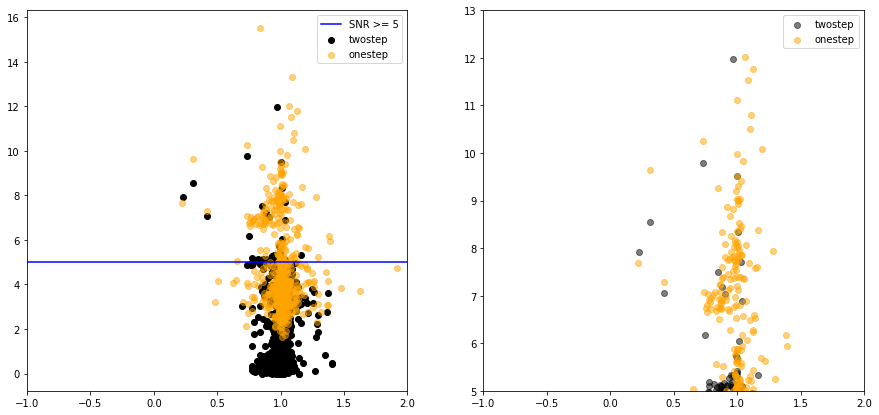

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
ax[0].scatter(df.asym_score, abs(df["signal/noise"]), c="black", label="twostep")
ax[0].scatter(
    df3.asym_score, abs(df3["signal/noise"]), c="orange", alpha=0.5, label="onestep"
)

# plt.scatter(random_05.asym_score,random_05['signal/noise'])
ax[0].axhline(y=5, color="blue", linestyle="-", label="SNR >= 5")
ax[0].set_xlim([-1, 2])
ax[1].scatter(
    df.asym_score, abs(df["signal/noise"]), c="black", alpha=0.5, label="twostep"
)
ax[1].scatter(
    df3.asym_score, abs(df3["signal/noise"]), c="orange", alpha=0.5, label="onestep"
)

ax[1].set_ylim([5, 13])
ax[1].set_xlim([-1, 2])

ax[0].legend()
ax[1].legend()
plt.show()